In [11]:
from pathlib import Path

# OR if in a notebook:
BASE_DIR = Path.cwd().parent.parent.parent

DATA_RAW = BASE_DIR / "data" / "raw"
DATA_PROCESSED = BASE_DIR / "data" / "processed"

print("BASE_DIR:", BASE_DIR)
print("DATA_RAW exists:", DATA_RAW.exists())
print("DATA_PROCESSED exists:", DATA_PROCESSED.exists())

BASE_DIR: /files/capstone_project/game-market-event-analyzer
DATA_RAW exists: True
DATA_PROCESSED exists: True


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

DATA_PROCESSED = BASE_DIR / "data" / "processed"

# Load the events with AR and CAR already computed
events = pd.read_csv(DATA_PROCESSED / "events_with_car.csv", sep=";")

events["event_date"] = pd.to_datetime(events["event_date"])
events["trading_date"] = pd.to_datetime(events["trading_date"])

events.head()

,event_id,event_date,trading_date,ticker,publisher,studio,is_rockstar,game,franchise,event_type,sentiment,impact_expectation_manual,adj_close,return,market_return,AR_event,CAR_m1_p1,CAR_m5_p5
0,ATVI_2019_CODMOBILE_LAUNCH,2019-10-01,2019-10-01,ATVI,Activision,TiMi Studios,0,Call of Duty: Mobile,Call of Duty,Release,Positive,Medium,94.157463,-0.010938,-0.012258,-0.001198,0.005278,-0.013979
1,ATVI_2019_CODMW_RELEASE,2019-10-25,2019-10-25,ATVI,Activision,Infinity Ward,0,Call of Duty: Modern Warfare,Call of Duty,Release,Positive,High,93.729248,0.003438,0.004073,-0.000318,0.000526,-0.002328
2,ATVI_2020_WARCRAFT3_REFORGED,2020-01-28,2020-01-28,ATVI,Activision Blizzard,Blizzard,0,Warcraft III: Reforged,Warcraft,Controversy,Negative,Medium,108.901489,0.012120,0.010054,0.003422,0.003371,-0.024705
3,ATVI_2020_WARZONE_LAUNCH,2020-03-10,2020-03-10,ATVI,Activision,Infinity Ward,0,Call of Duty: Warzone,Call of Duty,Release,Positive,High,100.609787,0.024274,0.049396,-0.016937,0.001569,-0.031189
4,ATVI_2021_LAWSUIT,2021-07-20,2021-07-20,ATVI,Activision Blizzard,NaN,0,NaN,Activision,Controversy,negative,high,137.807159,-0.001204,0.015163,-0.014124,-0.024080,0.003237


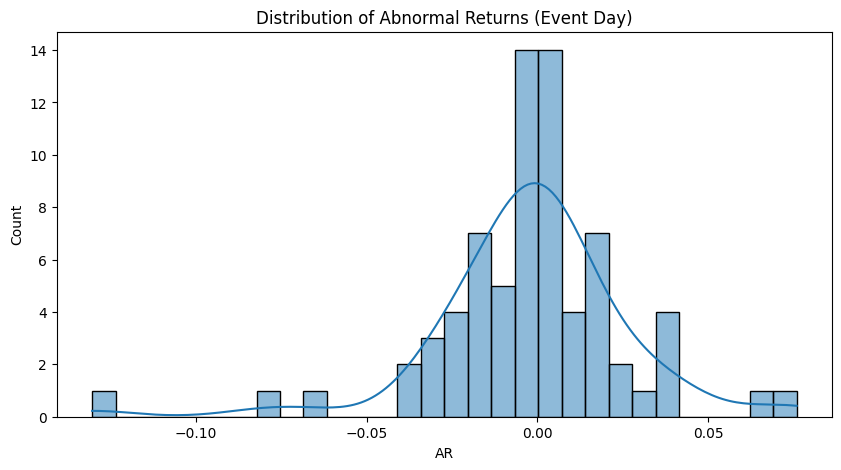

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(events["AR_event"].dropna(), bins=30, kde=True)
plt.title("Distribution of Abnormal Returns (Event Day)")
plt.xlabel("AR")
plt.ylabel("Count")
plt.show()

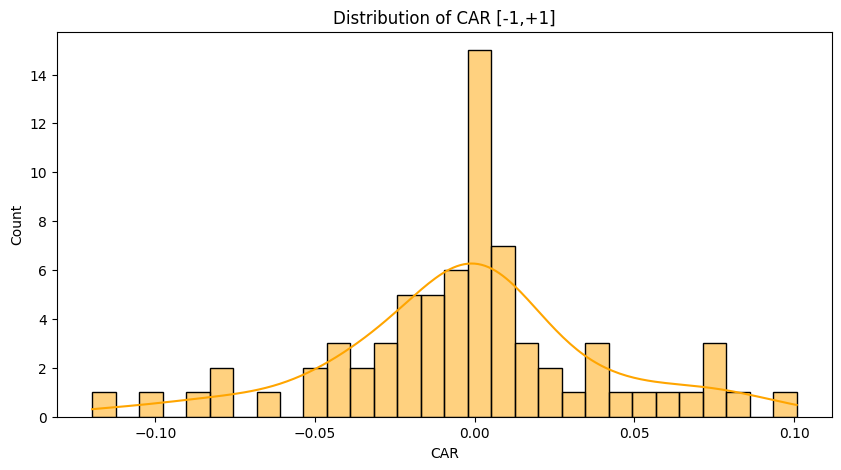

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(events["CAR_m1_p1"].dropna(), bins=30, kde=True, color='orange')
plt.title("Distribution of CAR [-1,+1]")
plt.xlabel("CAR")
plt.ylabel("Count")
plt.show()

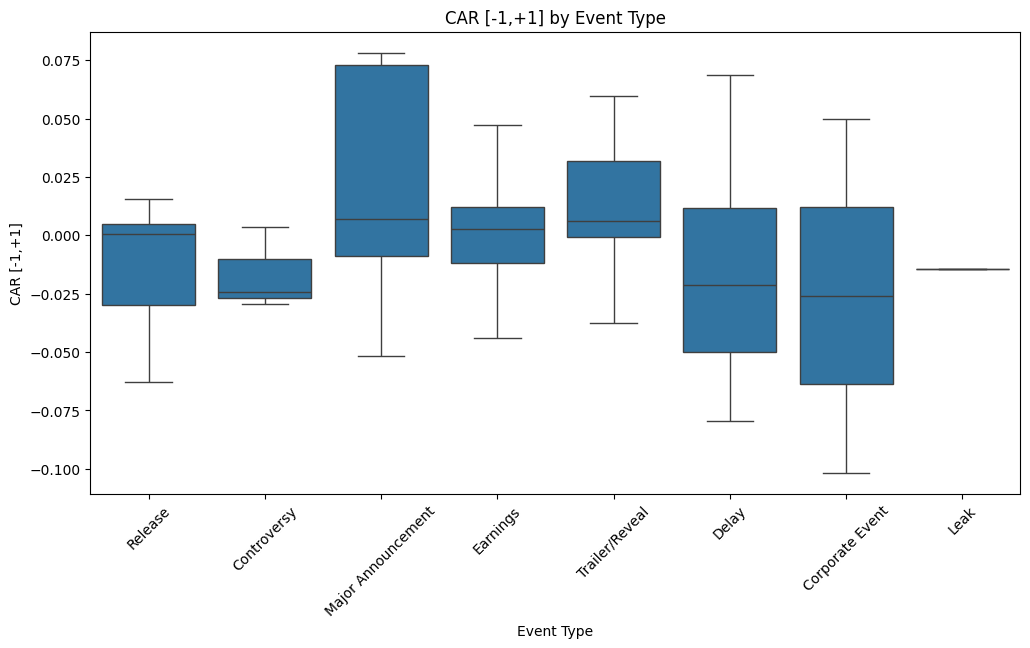

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=events,
    x="event_type",
    y="CAR_m1_p1",
    showfliers=False  # optional, remove extreme outliers
)
plt.xticks(rotation=45)
plt.title("CAR [-1,+1] by Event Type")
plt.ylabel("CAR [-1,+1]")
plt.xlabel("Event Type")
plt.show()

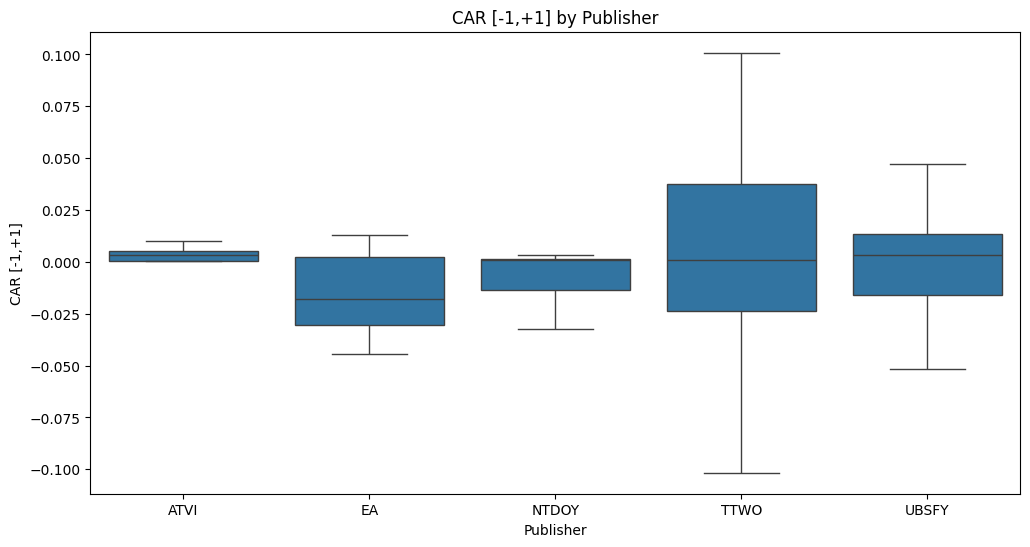

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=events,
    x="ticker",
    y="CAR_m1_p1",
    showfliers=False
)
plt.title("CAR [-1,+1] by Publisher")
plt.ylabel("CAR [-1,+1]")
plt.xlabel("Publisher")
plt.show()

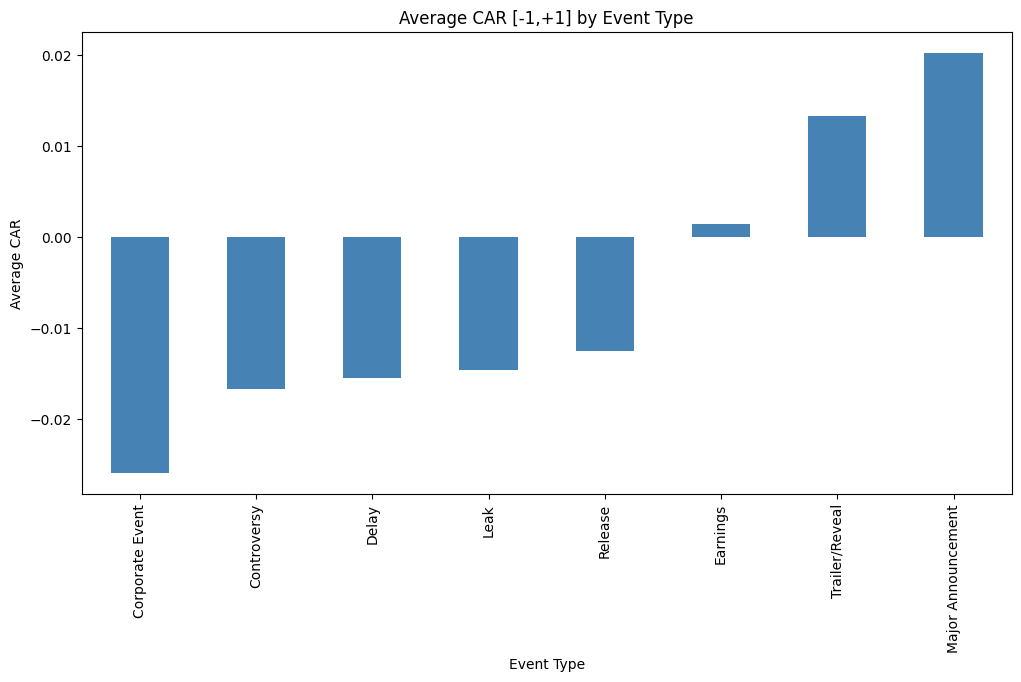

In [22]:
car_means = events.groupby("event_type")["CAR_m1_p1"].mean().sort_values()

plt.figure(figsize=(12,6))
car_means.plot(kind="bar", color="steelblue")
plt.title("Average CAR [-1,+1] by Event Type")
plt.ylabel("Average CAR")
plt.xlabel("Event Type")
plt.show()

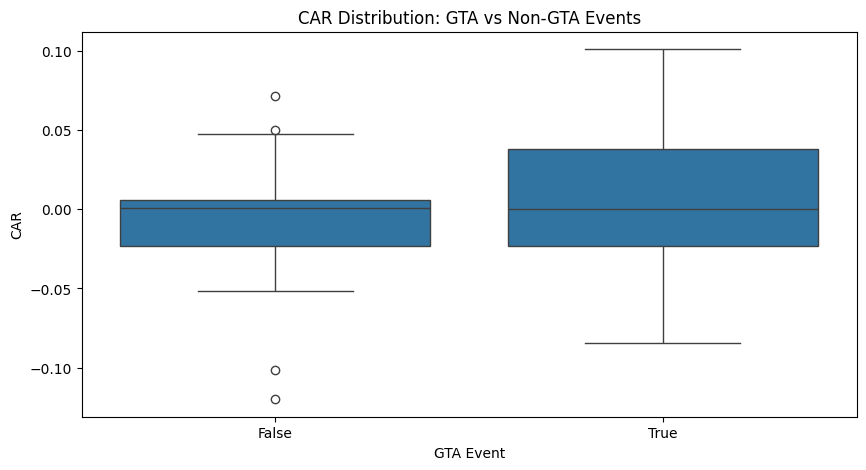

In [23]:
events["is_gta"] = events["is_rockstar"].str.contains("1", case=False, na=False)

plt.figure(figsize=(10,5))
sns.boxplot(data=events, x="is_gta", y="CAR_m1_p1")
plt.title("CAR Distribution: GTA vs Non-GTA Events")
plt.xlabel("GTA Event")
plt.ylabel("CAR")
plt.show()

In [24]:
gta_delay = events[events["event_id"].str.contains("GTA6", case=False, na=False)]
gta_delay[["event_id", "event_type", "event_date", "trading_date", "AR_event", "CAR_m1_p1"]]

,event_id,event_type,event_date,trading_date,AR_event,CAR_m1_p1
49,TTWO_2022_GTA6_DEV-ANNOUNCEMENT,Major Announcement,2022-02-04,2022-02-04,0.068098,0.078164
52,GTA6_2022_LEAK,Leak,2022-09-18,2022-09-16,-0.026813,-0.014621
55,TTWO_2023_GTA6_TRAILER1,Trailer/Reveal,2023-12-05,2023-12-05,-0.005089,0.004367
57,TTWO_2024_STRONG_RESULTS_GTA6_HYPE,Earnings,2024-05-16,2024-05-16,-0.012097,0.008283
58,GTA6_2024_KEYART,Trailer/Reveal,2024-05-16,2024-05-16,-0.012097,0.008283
59,TTWO_2025_GTA6_DELAY1,Delay,2025-05-02,2025-05-02,-0.081012,-0.079546
60,TTWO_2025_GTA6_TRAILER2,Trailer/Reveal,2025-05-06,2025-05-06,0.035617,0.039229
61,TTWO_2025_GTA6_DELAY2,Delay,2025-11-06,2025-11-06,0.000691,-0.076612
